In [190]:
def graficocombinaciones(equipo):
    import pandas as pd
    import functools 

    def get_key(my_dict, key):
        return functools.reduce(dict.get, key.split("."), my_dict)


    dfpartidos=pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/42.json')
    sep=dfpartidos['home_team'].apply(pd.Series)
    sep1=list(sep)
    dfpartidos[sep1]=pd.DataFrame(dfpartidos.home_team.values.tolist(),index=dfpartidos.index)
    sep=dfpartidos['away_team'].apply(pd.Series)
    sep1=list(sep)
    dfpartidos[sep1]=pd.DataFrame(dfpartidos.away_team.values.tolist(),index=dfpartidos.index)
    dfsoloequipo=dfpartidos.loc[(dfpartidos['home_team_name']==equipo) | (dfpartidos['away_team_name']==equipo)]
    listapartidos=dfsoloequipo['match_id'].tolist()
    filenames=[]
    for i in listapartidos:
        filenames.append(pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/'+str(i)+'.json'))
        dfeventos = pd.concat(filenames, ignore_index=True,sort=True)
    dfeventos=dfeventos[['player','shot','type','team']]
    dfeventos=dfeventos[dfeventos['player'].notnull()]

    from pandas import isnull
    dfeventos=dfeventos.applymap(lambda x: {'statsbomb_xg': 0.0,
     'end_location': [0, 0],
     'body_part': {'id': 38, 'name': 'Left Foot'},
     'technique': {'id': 95, 'name': 'Volley'},
     'first_time': True,
     'outcome': {'id': 96, 'name': 'Not Goal'},
     'type': {'id': 87, 'name': 'Open Play'},
     'freeze_frame': [{'location': [115.4, 35.4],
       'player': {'id': 31703, 'name': 'Anna Filbey'},
       'position': {'id': 9, 'name': 'Right Defensive Midfield'},
       'teammate': False}]} if isnull(x) else x)

    dfconnombres=dfeventos['player'].apply(pd.Series)
    dfmejor=pd.concat([dfeventos,dfconnombres],sort=False,axis=1)
    dfmejor.drop(columns=['player','id'],inplace=True)
    dfmejor.rename(columns={'name': 'nombrejug'},inplace=True)

    dfconequipos=dfeventos['team'].apply(pd.Series)
    dfbien=pd.concat([dfmejor,dfconequipos],sort=False,axis=1)
    dfbien.drop(columns=['team','id'],inplace=True)

    dfsolo=dfbien[dfbien['name']==equipo]
    dfsolo=dfsolo.drop(columns=['name','type'])

    lista=[]
    jugadora1=None
    jugadora2=None
    for i in range(len(dfsolo)):
        newdict=get_key(dfsolo.iloc[i,0],'outcome')
        resultado=newdict.get('name')
        newdict=get_key(dfsolo.iloc[i,0],'type')
        tipo=newdict.get('name')
        if (resultado=="Goal") & (tipo=="Open Play"):
            jugadora=dfsolo.iloc[i,1]
            for d in range(i-1,0,-1):
                if dfsolo.iloc[d,1] != jugadora:
                    jugadora1=dfsolo.iloc[d,1]
                    for x in range(d-1,0,-1):
                        if (dfsolo.iloc[x,1] != jugadora) & (dfsolo.iloc[x,1] != jugadora1):
                            jugadora2=dfsolo.iloc[x,1]
                            a=(jugadora,jugadora1,jugadora2)
                            lista.append(a)
                            break
                    break
                
    dfcomb=pd.DataFrame(lista,columns=['n','n-1','n-2'])
    dfcomb['combinacion3']=dfcomb['n-2']+" -> "+dfcomb['n-1']+ " -> "+dfcomb['n']
    dfcomb['combinacion2']=dfcomb['n-1']+" -> "+dfcomb['n']

    data2=dfcomb['combinacion2'].value_counts()
    data3=dfcomb['combinacion3'].value_counts()
    numerocomb2=pd.DataFrame(data2)
    numerocomb3=pd.DataFrame(data3)
    numerocomb2=numerocomb2.loc[numerocomb2['combinacion2']>=2]
    numerocomb3=numerocomb3.loc[numerocomb3['combinacion3']>=2]

    ax = numerocomb2.plot.bar(figsize=(10,6),width=0.3,legend=False, rot=0,color='#C2C2C2',edgecolor='black',linewidth=1.3)
    ax.set_xticks([]) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=15)
    plt.yticks(ticks=(1,2,3,4))
    ax.set_ylabel(ylabel="# de Goles",size=20,labelpad=20, family='bahnschrift')
    ax.set_xlabel(xlabel= "Combinación de jugadoras",size=20,labelpad=30, family='bahnschrift')
    ax.text(x=0.5,y=1.25,s="{}".format(equipo),color='black', ha='center', family='bahnschrift',size = 40,transform=ax.transAxes)

    for i in range(len(numerocomb2)):
        ax.text(x=i,y=numerocomb2.iloc[i,0]+0.1,s="{}".format(numerocomb2.index.values[i]),color='#000BEC', ha='left', family='bahnschrift',size = 10,rotation=22.5)

    ax2 = numerocomb3.plot.bar(figsize=(10,6),width=0.08,legend=False, rot=0,color='#C2C2C2',edgecolor='black',linewidth=1.3)
    ax2.set_xticks([]) 
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='both', labelsize=15)
    plt.yticks(ticks=(1,2,3,4))
    ax2.set_ylabel(ylabel="# de Goles",size=20,labelpad=20, family='bahnschrift')
    ax2.set_xlabel(xlabel= "Combinación de jugadoras",size=20,labelpad=30, family='bahnschrift')
    for i in range(len(numerocomb3)):
        ax2.text(x=i,y=numerocomb3.iloc[i,0]+0.1,s="{}".format(numerocomb3.index.values[i]),color='#000BEC', ha='left', family='bahnschrift',size = 10,rotation=22.5)


    plt.show()

TypeError: no numeric data to plot

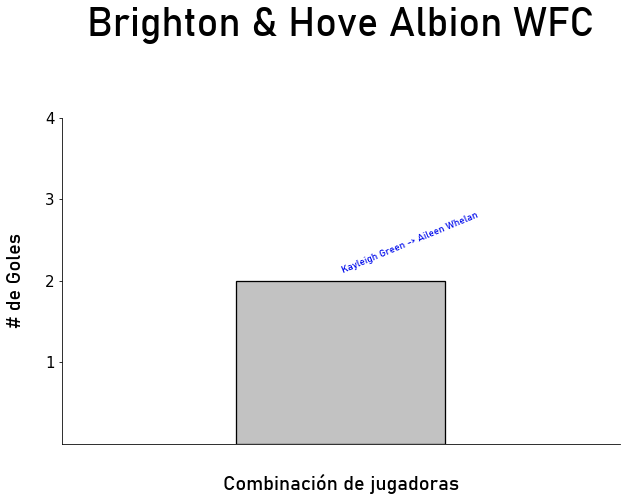

In [191]:
graficocombinaciones("Brighton & Hove Albion WFC")